# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

Jonathan Jalbert<br/>
Professeur agrégé au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>


---
# Projet A2023 : Prédiction du nombre de passages sur le REV 


L’analyse des données ouvertes de la circulation sur la rue Saint-Denis révèle une hausse importante de l’utilisation du vélo par rapport aux autres véhicules, au tournant de l’installation du Réseau express vélo (REV) en 2020 comme le rapporte le journal *Le Devoir* dans cet [article](https://www.ledevoir.com/environnement/735849/le-ratio-velo-auto-s-ameliore-sur-le-rev-saint-denis). Serez-vous en mesure de prédire l'achalandage du REV pour l'année 2023, de janvier à septembre ? Est-ce que les conditions météorologiques ont une influence sur le nombre de passages ? Ce sont des questions que vous aurez l'occasion d'étudier dans le cadre de ce projet.

**But** : Prédire le nombre de passages journalier sur le REV en direction nord à l'intersection de la rue St-Denis et de la Piste des Carrières pour tous les jours entre le 1er janvier 2023 et le 30 septembre 2023.

**Objectifs spécifiques non exhaustifs**
1. Effectuer une analyse exploratoire des données afin d'extraire qualitativement certains les potentiels liens entre les variables.
2. Élaborer plusieurs modèles prédictifs pour le nombre de passages journaliers sur le REV en fonction des différentes variables explicatives à disposition (nombre de passages sur d'autres tronçons, conditions météorologiques, etc.).
3. Sélectionner le meilleur modèle prédicitif à l'aide d'un critère choisi.
4. Exploiter le modèle choisi pour effectuer vos prédictions.

Ces étapes peuvent être recommencées autant de fois que nécessaire afin d'obtenir le meilleur modèle prédictif possible.

La description du projet est disponible à l'adresse suivante : https://www.kaggle.com/t/b2f3163a94434f0da9e532139744c49d

Ce calepin Jupyter de base permet de charger les données fournies. La dernière section détaille la génération du fichier des prédictions afin de le soumettre sur Kaggle dans le bon format.

### Données

Dans un premier temps, vous devrez récupérer les données sur Kaggle. Les fichiers disponibles sont les suivants :
- train.csv
- test.csv

**Déposez ces fichiers dans le répertoire de ce calepin.**

Le fichier *train.csv* contient les conditions météorologiques ainsi que le nombre de passages enregistrés sur le tronçon du REV à l'intersection St-Denis/Castelnau (45.53905N,-73.61687W). Voici la description des variables :

- Date : date
- MaxTemp : Température maximale (°C)
- MinTemp : Température minimale (°C)
- MeanTemp : Température moyenne (°C)
- TotalRain : Accumulation totale de pluie (mm)
- TotalSnow : Accumulation totale de neige (cm)
- TotalPrecip : Accumulation totale de précipitations (pluie + neige, mm)
- SnowGrnd : Couvert de neige au sol (cm)
- SpdGust : Vitesse maximale des rafales de vent (km/h)
- REV : Nombre de passages de vélo au compteur sur le REV en direction sud à l'intersection St-Denis/Castelnau 

Le fichier *test.csv* contient les conditions météorologiques pour l'année 2023 mais pas le nombre de passages sur le REV, la variable que vous devrez prédire. Le fichier contient aussi l'identifiant (:ID) pour les prédictions. La qualité de vos prédictions sera ensuite évaluée avec le [*Root Mean Squared Log Error*](https://www.kaggle.com/code/carlolepelaars/understanding-the-metric-rmsle) lorsque vous les téléverserez sur Kaggle. Vos prédictions seront comparées à celles des autres équipes de la classe.


### Consignes

- Vous devez constituer une équipe de 3 à 5 personnes.
- Au moins une solution doit être proposée sur Kaggle.
- Utilisez votre identifiant d'équipe pour téléverser vos prédictions sur Kaggle.
- Un seul calepin *.ipynb* par équipe doit être remis. Ce fichier devra documenter et illustrer la procédure qui vous a permis de produire vos meilleures prédictions. Ce fichier constitue le rapport final du projet.
- Le langage Julia doit être utilisé.
- Votre démarche doit être rigoureusement justifiée (consultez la grille de correction pour vous orienter).

### Quelques conseils

Votre calepin doit permettre à une personne à l'extérieur de l'équipe de comprendre votre démarche et de reproduire vos résultats. Par exemple, une bonne façon de faire consiste à expliquer dans une cellule de texte la tâche qui est accomplie dans la cellule de code suivante. 

Je vous encourage fortement à faire une analyse exploratoire des données pour développer une meilleure expertise sur le problème. C'est une étape qui est toujours négligée mais qui est essentielle. C'est avec l'analyse exploratoire que vous viendra des idées d'amélioration, comme par exemple créer de nouvelles variables explicatives.

Vous pouvez utiliser directement tout ce qui se trouve dans les notes de cours sans explication et toutes les librairies utilisées dans le cours (incluant mes fonctions).

Ce calepin contient un modèle très simple de prédiction : on n'utilise qu'une seule variable explicative. Ce sera votre travail d'améliorer ces prédictions avec la méthode et les variables de votre choix.

S'il y a des données manquantes, ce sera à vous de traiter ce problème. Vous devriez développer une méthode d'imputation (de remplacement) des données manquantes.

Attention aux données aberrantes. Elles peuvent faire dérailler tous le modèle prédictif si elle ne sont pas prises en compte.

Prenez la peine de documenter succinctement les essais infructueux. Ce n'est pas nécessaire de les expliquer en détails, mais c'est important de les mentionner dans la discussion avec une raison possible de leur échec. De cette façon, une personne qui reprendra votre travail dans le futur ne perdra pas de temps à réessayer une méthode infructueuse déjà testée.

Vous pouvez aussi indiquer dans votre rapport les raisons qui vous font croire pourquoi une méthode a moins bien performée de ce qui était attendu. Vous pouvez également mentionner ce que vous auriez pu tenter si vous aviez eu plus de temps ou plus de données. L'idée est de guider l'analyste qui prendrait la relève de votre travail.

Vous êtes limités à deux soumissionspar jour et par équipe sur Kaggle. Je vous suggère donc de bien tester vos modèles localement et de ne téléverser que vos meilleurs prédictions de la journée.

In [2]:
import Pkg
Pkg.add("MLDataUtils")

    Updating registry at `C:\Users\lenovo\.julia\registries\General.toml`


   Resolving package versions...

  No Changes to `C:\Users\lenovo\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\lenovo\.julia\environments\v1.9\Manifest.toml`

In [3]:
using CSV, DataFrames, Dates, Gadfly, GLM, Statistics, MLDataUtils, Dates, Random


---
## 1. Chargement de données

In [4]:
train = CSV.read("train.csv", DataFrame)
first(train, 5)

Row,Date,MaxTemp,MinTemp,MeanTemp,TotalRain,TotalSnow,TotalPrecip,SnowGrnd,SpdGust,REV
,Date,Float64?,Float64?,Float64?,Float64,Float64,Float64,Int64?,Int64?,Int64
1,2021-10-23,8.2,1.6,4.9,0.0,0.0,0.0,missing,missing,168
2,2021-10-24,11.9,2.5,7.2,0.0,0.0,0.0,missing,missing,694
3,2021-10-25,7.8,3.0,5.4,1.2,0.0,1.2,missing,43,746
4,2021-10-26,11.3,7.2,9.3,7.2,0.0,7.2,missing,53,646
5,2021-10-27,12.6,6.1,9.4,0.0,0.0,0.0,missing,59,1250


---
## 2. Analyse exploratoire

Cette section consitue une analyse exploratoire superficielle permettant de se familiariser avec les données. C'est une analyse exploratoire sommaire. Je vous encourage fortement à poursuivre cette analyse.

#### 2.1 Nombre de passages sur le REV en fonction de la date

In [4]:
set_default_plot_size(12cm, 10cm)
plot(train, x=:Date, y=:REV)

La date représente une forte relation avec le nb de passage

In [5]:
train[!, :Year] = year.(train[:, :Date])
train[!, :Month] = month.(train[:, :Date])
train[!, :Day] = day.(train[:, :Date])
train[!, :WeekDay] = dayofweek.(train[:, :Date]) # 1=Monday, 7=Sunday

435-element Vector{Int64}:
 6
 7
 1
 2
 3
 4
 5
 6
 7
 1
 ⋮
 5
 6
 7
 1
 2
 3
 4
 5
 6

In [ ]:
set_default_plot_size(16cm, 12cm)

fig1 = plot(train, x=:Year, y=:REV)
fig2 = plot(train, x=:Month, y=:REV)
fig3 = plot(train, x=:Day, y=:REV)
fig4 = plot(train, x=:WeekDay, y=:REV)

gridstack([fig1 fig2; fig3 fig4])

Les mois de l'années semble pouvoir être séparé en trois catégories

In [6]:
# Fonction pour regrouper les mois
function categorize_month(month)
    if month in [12, 1, 2, 3]
        return "Winter"
    elseif month in [4, 10, 11]
        return "Transition"
    else
        return "Summer"
    end
end

# Appliquer la fonction de catégorisation à chaque mois
train[!, :MonthCategory] = categorize_month.(train[:, :Month])



435-element Vector{String}:
 "Transition"
 "Transition"
 "Transition"
 "Transition"
 "Transition"
 "Transition"
 "Transition"
 "Transition"
 "Transition"
 "Transition"
 ⋮
 "Winter"
 "Winter"
 "Winter"
 "Winter"
 "Winter"
 "Winter"
 "Winter"
 "Winter"
 "Winter"

In [ ]:
plot(train, x=:MonthCategory, y=:REV)

In [7]:
holiday_dates = [Date(2023, 1, 1), Date(2023, 12, 25)]  # Exemple : Nouvel An et Noël

# Fonction pour vérifier si une date est un jour férié
is_holiday(date) = date in holiday_dates ? 1 : 0

# Créer la nouvelle colonne
data[!, :IsHoliday] = is_holiday.(data[:, :Date])

UndefVarError: UndefVarError: `data` not defined

#### 2.2 Nombre de passages sur le REV en fonction de la température

In [ ]:
set_default_plot_size(16cm, 12cm)

fig1 = plot(train, x=:MeanTemp, y=:REV)
fig2 = plot(train, x=:MinTemp, y=:REV)
fig3 = plot(train, x=:MaxTemp, y=:REV)
fig4 = plot()

gridstack([fig1 fig2; fig3 fig4])

Les trois variables semblent être fortement corrélées

#### 2.2 Nombre de passages sur le REV en fonction des précipitations

In [ ]:
set_default_plot_size(16cm, 12cm)

fig1 = plot(train, x=:TotalPrecip, y=:REV)
fig2 = plot(train, x=:TotalRain, y=:REV)
fig3 = plot(train, x=:TotalSnow, y=:REV)
fig4 = plot()

gridstack([fig1 fig2; fig3 fig4])

TotalPrecip semble regrouper les deux autres variables 

#### 2.2 Nombre de passages sur le REV en fonction du type de neiges et du vent


In [ ]:
set_default_plot_size(16cm, 12cm)

fig1 = plot(train, x=:SnowGrnd, y=:REV)
fig2 = plot(train, x=:SpdGust, y=:REV)
fig3 = plot()
fig4 = plot()

gridstack([fig1 fig2; fig3 fig4])

Il semble difficile d'observer une relation avec ces variables

#### Conclusion

Essayer un modèle avec comme variable explicative MeanTemp et TotalPrecip

---
## 3. Ajustement d'un modèle de régression linéaire

Pour cet exemple simple, on n'utilise que la température moyenne pour prédire le logarithme des passages sur le REV avec la régression linéaire. On pourrait aussi pu utiliser un modèle linéaire généralisé pour modéliser le nombre de passages avec la loi de Poisson.

### Sépration en train et validation set

#### 3.1. Transformation du nombres de passages à l'échelle logarithmique

In [224]:
data = deepcopy(train)
count(ismissing.(data.TotalRain))
coalesceWithPrevious!(data.TotalRain)
count(ismissing.(data.SpdGust))
coalesceWithPrevious!(data.SpdGust)
count(ismissing.(data.TotalSnow))
coalesceWithPrevious!(data.TotalSnow)
count(ismissing.(data.MeanTemp))
coalesceWithPrevious!(data.MeanTemp)
data[!,:TotalPrecip_2] = data[!,:TotalPrecip].^2
data[!,:TotalRain_2] = data[!,:TotalRain].^2
#data[!,:MinTemp_2] = data[!,:MinTemp].^2
data[!,:REV] = train.REV
first(data,5)

Row,Date,MaxTemp,MinTemp,MeanTemp,TotalRain,TotalSnow,TotalPrecip,SnowGrnd,SpdGust,REV,Year,Month,Day,WeekDay,MonthCategory,TotalPrecip_2,TotalRain_2
,Date,Float64?,Float64?,Float64?,Float64,Float64,Float64,Int64?,Int64?,Int64,Int64,Int64,Int64,Int64,String,Float64,Float64
1,2021-10-23,8.2,1.6,4.9,0.0,0.0,0.0,missing,43,168,2021,10,23,6,Transition,0.0,0.0
2,2021-10-24,11.9,2.5,7.2,0.0,0.0,0.0,missing,43,694,2021,10,24,7,Transition,0.0,0.0
3,2021-10-25,7.8,3.0,5.4,1.2,0.0,1.2,missing,43,746,2021,10,25,1,Transition,1.44,1.44
4,2021-10-26,11.3,7.2,9.3,7.2,0.0,7.2,missing,53,646,2021,10,26,2,Transition,51.84,51.84
5,2021-10-27,12.6,6.1,9.4,0.0,0.0,0.0,missing,59,1250,2021,10,27,3,Transition,0.0,0.0


#### Standardisation

In [225]:
function standardize_columns!(df::DataFrame, colnames::Vector{Symbol})
    for colname in colnames
        col = df[!, colname]
        mean_val = mean(skipmissing(col))
        std_val = std(skipmissing(col))
        df[!, colname] = (col .- mean_val) ./ std_val
    end
end
standardize_columns!(data, [:MeanTemp, :TotalRain, :TotalPrecip,:TotalSnow])
# One Hot
function create_dummy_variables(df::DataFrame, column_name::Symbol)
    unique_values = unique(getproperty(df, column_name))
    dummy_vars = select(df, [column_name => ByRow(isequal(v)) => Symbol(v) for v in unique_values])
    return hcat(df, dummy_vars)
end
data = create_dummy_variables(data, :MonthCategory)
data = create_dummy_variables(data, :WeekDay)



Row,Date,MaxTemp,MinTemp,MeanTemp,TotalRain,TotalSnow,TotalPrecip,SnowGrnd,SpdGust,REV,Year,Month,Day,WeekDay,MonthCategory,TotalPrecip_2,TotalRain_2,Transition,Winter,Summer,6,7,1,2,3,4,5
,Date,Float64?,Float64?,Float64,Float64,Float64,Float64,Int64?,Int64?,Int64,Int64,Int64,Int64,Int64,String,Float64,Float64,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool,Bool
1,2021-10-23,8.2,1.6,-0.14011,-0.379802,-0.252522,-0.436236,missing,43,168,2021,10,23,6,Transition,0.0,0.0,true,false,false,true,false,false,false,false,false,false
2,2021-10-24,11.9,2.5,0.0564683,-0.379802,-0.252522,-0.436236,missing,43,694,2021,10,24,7,Transition,0.0,0.0,true,false,false,false,true,false,false,false,false,false
3,2021-10-25,7.8,3.0,-0.0973753,-0.2044,-0.252522,-0.272906,missing,43,746,2021,10,25,1,Transition,1.44,1.44,true,false,false,false,false,true,false,false,false,false
4,2021-10-26,11.3,7.2,0.235952,0.672608,-0.252522,0.543746,missing,53,646,2021,10,26,2,Transition,51.84,51.84,true,false,false,false,false,false,true,false,false,false
5,2021-10-27,12.6,6.1,0.244499,-0.379802,-0.252522,-0.436236,missing,59,1250,2021,10,27,3,Transition,0.0,0.0,true,false,false,false,false,false,false,true,false,false
6,2021-10-28,10.8,3.4,0.0479214,-0.379802,-0.252522,-0.436236,missing,45,1373,2021,10,28,4,Transition,0.0,0.0,true,false,false,false,false,false,false,false,true,false
7,2021-10-29,12.7,0.9,0.0222808,-0.379802,-0.252522,-0.436236,missing,36,1327,2021,10,29,5,Transition,0.0,0.0,true,false,false,false,false,false,false,false,false,true
8,2021-10-30,12.7,2.5,0.0906557,1.49115,-0.252522,1.30595,missing,38,662,2021,10,30,6,Transition,163.84,163.84,true,false,false,true,false,false,false,false,false,false
9,2021-10-31,11.1,7.8,0.253046,5.17459,-0.252522,4.73589,missing,45,188,2021,10,31,7,Transition,1444.0,1444.0,true,false,false,false,true,false,false,false,false,false


In [226]:
features = [:MonthCategory, :TotalPrecip, :TotalPrecip_2, :WeekDay, :TotalRain, :TotalRain_2, :SpdGust, :TotalSnow, :MeanTemp, :Month]  # Variables explicatives 
target = :REV                              # Variable cible
# definition du train_set
train_set = data[:, [features..., target]]

Row,MonthCategory,TotalPrecip,TotalPrecip_2,WeekDay,TotalRain,TotalRain_2,SpdGust,TotalSnow,MeanTemp,Month,REV
,String,Float64,Float64,Int64,Float64,Float64,Int64?,Float64,Float64,Int64,Int64
1,Transition,-0.436236,0.0,6,-0.379802,0.0,43,-0.252522,-0.14011,10,168
2,Transition,-0.436236,0.0,7,-0.379802,0.0,43,-0.252522,0.0564683,10,694
3,Transition,-0.272906,1.44,1,-0.2044,1.44,43,-0.252522,-0.0973753,10,746
4,Transition,0.543746,51.84,2,0.672608,51.84,53,-0.252522,0.235952,10,646
5,Transition,-0.436236,0.0,3,-0.379802,0.0,59,-0.252522,0.244499,10,1250
6,Transition,-0.436236,0.0,4,-0.379802,0.0,45,-0.252522,0.0479214,10,1373
7,Transition,-0.436236,0.0,5,-0.379802,0.0,36,-0.252522,0.0222808,10,1327
8,Transition,1.30595,163.84,6,1.49115,163.84,38,-0.252522,0.0906557,10,662
9,Transition,4.73589,1444.0,7,5.17459,1444.0,45,-0.252522,0.253046,10,188


#### 3.2 Cross-validation K-fold

In [231]:
# Nombre de folds
k = 5

# Taille de chaque fold
fold_size = size(train_set, 1) ÷ k

# Stocker les erreurs pour chaque fold
errors = []

# Shuffle
train_set = shuffle(train_set)

for i in 1:k
    # Créer des indices pour le test set
    test_indices = ((i-1)*fold_size+1):min(i*fold_size, size(train_set, 1))

    # Séparer les données en train et test sets
    test_set = train_set[test_indices, :]
    train_set_fold = train_set[setdiff(1:end, test_indices), :]

    # Entraîner le modèle sur le train set
    model = glm(@formula(REV ~ MonthCategory + MeanTemp + TotalRain + TotalRain_2 + SpdGust + WeekDay + TotalSnow ), train_set_fold, Poisson())

    # Évaluer le modèle sur le test set
    predictions = predict(model, test_set)
    mse = mean((predictions - test_set[:, target]).^2)  # MSE
    ss_res = sum((predictions .- test_set[:, target]).^2)  # Somme des carrés des résidus
    ss_tot = sum((test_set[:, target] .- mean(test_set[:, target])).^2)  # Somme totale des carrés
    r_squared = 1 - ss_res / ss_tot

    println("Fold $i, MSE: $(mse), R^2: $(r_squared)")

    push!(errors, mse)
end

# Calcul de l'erreur moyenne sur tous les folds
mean_error = mean(errors)
println("Erreur moyenne de validation croisée (MSE): ", mean_error)

Fold 1, MSE: 99482.79780485241, R^2: 0.8516550612661158
Fold 2, MSE: 114268.48321716164, R^2: 0.8473140142290876


Fold 3, MSE: 74874.67802719394, R^2: 0.8871677180026744
Fold 4, MSE: 72452.20674110384, R^2: 0.886103151772084
Fold 5, MSE: 123308.11863569851, R^2: 0.8284011088216668
Erreur moyenne de validation croisée (MSE): 96877.25688520206


##### Sans Standardisation:

    MonthCategory + MeanTemp + TotalRain + TotalRain_2 + SpdGust + WeekDay + TotalSnow:
    
    Erreur moyenne de validation croisée (MSE): 96448.00049954507

##### Avec Standardisation:
    MonthCategory + MeanTemp + TotalRain + TotalRain_2 + SpdGust + WeekDay + TotalSnow:

    Erreur moyenne de validation croisée (MSE): 97006.17921665606


In [25]:
model =glm(@formula(REV ~ MonthCategory + TotalPrecip + WeekDay ), train_set, Poisson())

UndefVarError: UndefVarError: `train_set_fold` not defined

#### 3.3. Ajustement du modèle de régression linéaire

In [107]:
model = lm(@formula(REV ~ MonthCategory + TotalPrecip ), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

REV ~ 1 + MonthCategory + TotalPrecip

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────
                                Coef.  Std. Error       t  Pr(>|t|)   Lower 95%   Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────
(Intercept)                 7.59478    0.0501692   151.38    <1e-99   7.4961      7.69345
MonthCategory: Transition  -0.891604   0.0723204   -12.33    <1e-28  -1.03385    -0.749358
MonthCategory: Winter      -2.38316    0.0687759   -34.65    <1e-99  -2.51844    -2.24789
TotalPrecip                -0.0272999  0.00405996   -6.72    <1e-10  -0.0352854  -0.0193144
───────────────────────────────────────────────────────────────────────────────────────────

### Analyse

##### Var explicative indicatrice :  

    MeanTemp 

    WeekDay

    MonthCategory

   

##### Var explicative pas indicatrice :  ( 0 dans l'intervalle ou faible p value)

    Month

    TotalPrecip
    
    Day
    
    SnowGrnd

    SpdGust


N'indique pas forcément qu'une variable est ou qu'elle ne soit pas forcément utile pour un modèle.

--> But modifier les variables

#### 3.3. Validation graphique

Pour avoir un aperçu de la qualité de la regression, on ajoute la droite de régression.

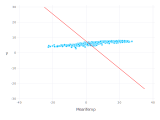

In [54]:
β̂ = coef(model)

points = layer(data, x=:MeanTemp, y=:REV, Geom.point)
line = layer(x->β̂[1]+β̂[2]*x, -25, 35, Theme(default_color="red"))

plot(line, points)

### Validation

In [108]:
y_val =  val_set.REV

87-element view(::Vector{Int64}, [353, 216, 211, 15, 391, 6, 97, 2, 394, 299  …  362, 76, 348, 7, 276, 405, 371, 121, 240, 425]) with eltype Int64:
  906
 1550
 1602
  859
  419
 1373
  184
  694
  189
 2373
    ⋮
  180
 2114
 1327
 1741
  427
 1325
   79
 2038
  311

In [109]:
valid_predictions = exp.(predict(model, val_set))

87-element Vector{Float64}:
  814.9876125928812
 1955.4917313431367
 1987.786344825354
  814.9876125928812
  814.9876125928812
  814.9876125928812
  171.75929261453217
  814.9876125928812
  810.5499215259762
 1987.786344825354
    ⋮
  183.38977541570497
  814.9876125928812
  814.9876125928812
 1944.8438784758036
  182.39119929559078
  814.9876125928812
  183.38977541570497
 1987.786344825354
  183.38977541570497

In [110]:
mse = mean((valid_predictions - y_val).^2)

# Calcul de l'erreur absolue moyenne (MAE)
mae = mean(abs.(valid_predictions - y_val))

# Calcul du coefficient de détermination (R²)
ss_res = sum((valid_predictions - y_val).^2)
ss_tot = sum((y_val .- mean(y_val)).^2)
r_squared = 1 - ss_res / ss_tot

n = length(y_val)
p = size(train, 2) - 1  # nombre de colonnes dans le DataFrame moins la colonne de la variable dépendante

# Calcul du R² ajusté
r_squared_adjusted = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)


println("MSE: $mse")
println("MAE: $mae")
println("R²: $r_squared")
println("R² ajusté: $r_squared_adjusted")


MSE: 118637.8616564326
MAE: 256.9352952139613
R²: 0.8057704001331117
R² ajusté: 0.7680035334923279


### Results 

#### Base model :
- Var exp : MeanTemp

        MSE: 294704.42019465164

        MAE: 370.55641470239317

        R²: 0.5660133870700157

#### Base model + TotalPrecip
- Var exp : MeanTemp + TotalPrecip

        MSE: 258069.1233741078

        MAE: 335.73375211283457

        R²: 0.6199631322768607

#### TotalPrecip model
- Var exp : TotalPrecip

        MSE: 742379.0818495037

        MAE: 703.0119897632813
        
        R²: -0.09323973841022393

#### Base model + WeekDay:

- Var exp : MeanTemp + WeekDay

        MSE: 281871.12994773564

        MAE: 355.28947005346663

        R²: 0.5849119029569776


#### Base model + Month:

- Var exp : MeanTemp + Month

        MSE: 296768.0995938421

        MAE: 372.2910879059729
        
        R²: 0.5762029920844802

##### MonthCategory model:

- Var exp : MonthCategory

        MSE: 190378.36412332402

        MAE: 314.5213786112456
        
        R²: 0.7281318942374957

        R² ajusté: 0.6752686514503421


##### MonthCategory + WeekDay model:

- Var exp : MonthCategory + WeekDay

        MSE: 207413.97229572176

        MAE: 335.34061983101185
        
        R²: 0.7038043476401217


##### MonthCategory + TotalRain model:

- Var exp : MonthCategory + TotalRain

        MSE: 143271.4276388442

        MAE: 277.16203863351467
        
        R²: 0.795402530001621

##### MonthCategory + TotalPrecip model:

- Var exp : MonthCategory + TotalPrecip

        MSE: 135866.59393480886

        MAE: 270.4364326800448
        
        R²: 0.8059769359845317

        R² ajusté: 0.7682502290926351

        MSE: 118637.8616564326

        MAE: 256.9352952139613

        R²: 0.8057704001331117
        
        R² ajusté: 0.7680035334923279

---
## 4. Estimation du nombre de passages de l'ensemble de test

On utilise le modèle simple de la section précédente pour le nombre de passages pour chacun des jours de l'ensemble de test.

#### 4.1 Chargement des données de l'ensemble de test

In [72]:
test = CSV.read("test.csv", DataFrame)
first(test, 5)

Row,ID,Date,MaxTemp,MinTemp,MeanTemp,TotalRain,TotalSnow,TotalPrecip,SnowGrnd,SpdGust,REV
,Int64,Date,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64?,Int64?,Int64
1,1,2023-01-01,4.0,0.7,2.4,4.0,0.0,4.0,0,missing,83
2,2,2023-01-02,3.9,0.3,2.1,1.4,0.0,1.4,0,missing,126
3,3,2023-01-03,4.2,1.0,2.6,0.0,0.0,0.0,0,missing,287
4,4,2023-01-04,2.8,-4.1,-0.7,1.4,3.0,4.4,0,64,253
5,5,2023-01-05,-2.7,-5.0,-3.9,2.8,0.8,3.6,2,62,148


### Transformation

In [73]:
test[!, :Month] = month.(test[:, :Date])
test[!, :MonthCategory] = categorize_month.(test[:, :Month])

273-element Vector{String}:
 "Winter"
 "Winter"
 "Winter"
 "Winter"
 "Winter"
 "Winter"
 "Winter"
 "Winter"
 "Winter"
 "Winter"
 ⋮
 "Summer"
 "Summer"
 "Summer"
 "Summer"
 "Summer"
 "Summer"
 "Summer"
 "Summer"
 "Summer"

#### 4.2 Traitement des valeurs manquantes

Dans l'ensemble de test, il y a des jours pour lesquelles la température moyenne (la variable explicative utilisée dans le modèle simple) est manquante. 

Ici, je propose de remplacer les valeurs manquantes par la température moyenne du jour précédent. C'est une façon simple et même peut-être simpliste de traiter les valeurs manquantes. Ce sera à vous de décider comment les traiter.

In [74]:
# Nombre de jours où il manque la température moyenne
count(ismissing.(test.MeanTemp))

count(ismissing.(test.MonthCategory))

count(ismissing.(test.TotalPrecip))

1

In [34]:
"""
    coalesceWithPrevious!(x::AbstractArray{T} where T <: Union{Missing, Real})
    
Coalesce missing values with the previous non-missing.

### Details

If the first element of `x` is missing, than it is replace with the first non-missing value.
"""
function coalesceWithPrevious!(x::AbstractArray{T} where T <: Union{Missing, Real})
    
    if ismissing(x[1])
        x[1] = x[findfirst(.!(ismissing.(x)))]
    end
        
    ind = findall(ismissing.(x))
    
    for i in ind
        x[i] = x[i-1]
    end
    
    return x
    
end

coalesceWithPrevious!

In [76]:
# Remplacement des valeurs manquantes par la valeur précédente.
coalesceWithPrevious!(test.MeanTemp)

coalesceWithPrevious!(test.TotalPrecip)

# Nombre de valeurs manquantes après le remplacement
print(count(ismissing.(test.MeanTemp)))
print(count(ismissing.(test.TotalPrecip)))

00

In [79]:
test[!,:TotalPrecip_2] = test[!,:TotalPrecip].^2
first(test,5)

Row,ID,Date,MaxTemp,MinTemp,MeanTemp,TotalRain,TotalSnow,TotalPrecip,SnowGrnd,SpdGust,REV,Month,MonthCategory,TotalPrecip_2
,Int64,Date,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64?,Int64?,Int64,Int64,String,Float64
1,1,2023-01-01,4.0,0.7,2.4,4.0,0.0,4.0,0,missing,83,1,Winter,16.0
2,2,2023-01-02,3.9,0.3,2.1,1.4,0.0,1.4,0,missing,126,1,Winter,1.96
3,3,2023-01-03,4.2,1.0,2.6,0.0,0.0,0.0,0,missing,287,1,Winter,0.0
4,4,2023-01-04,2.8,-4.1,-0.7,1.4,3.0,4.4,0,64,253,1,Winter,19.36
5,5,2023-01-05,-2.7,-5.0,-3.9,2.8,0.8,3.6,2,62,148,1,Winter,12.96


#### 4.3 Prédictions

On retransforme les prédictions dans l'espace logarithmique pour obtenir des nombres de passages.

In [80]:
predictions = exp.(predict(model, test))

# Vous pouvez transformer vos prédictions en valeurs entières si vous le souhaitez. Mais ce n'est pas nécessaire.
# predictions = Int.(round.(predictions, digits=0))

273-element Vector{Float64}:
  161.1521835314611
  179.89474252666975
  191.61813684487961
  158.5795026152877
  163.80300489303193
  186.44089978984826
  191.61813684487961
  191.61813684487961
  188.14045908358113
  191.61813684487961
    ⋮
 2016.7707053191543
 2016.7707053191543
 2016.7707053191543
 2016.7707053191543
 2016.7707053191543
 2016.7707053191543
 2016.7707053191543
 2016.7707053191543
 2016.7707053191543

#### 4.4 Préparation du fichier des préditions pour téléverser sur Kaggle

Le fichier *benchmark_predictions.csv* généré peut être téléversé sur Kaggle. Il est composé d'une colonne d'identifiants (:ID) et d'une colonne de la prédiction (:REV).

In [81]:
benchmark_predictions = DataFrame(ID = test.ID, REV=predictions)
first(benchmark_predictions, 5)

Row,ID,REV
,Int64,Float64
1,1,161.152
2,2,179.895
3,3,191.618
4,4,158.58
5,5,163.803


In [82]:
CSV.write("benchmark_predictions.csv", benchmark_predictions)

"benchmark_predictions.csv"